### Game analysis: churn, virality, monetization

This Colab notebook demonstrates the effect of churn and virality on one's playerbase and concludes with a monetization forecasting simulation for a hypothetical game company. It also serves as a tutorial on python programming and data plotting for those only familiar with Unity & C#. 

**Learning goals:** Understanding basics of Colab notebooks and Python. Understanding how simple recursive dependencies can lead to exponential growth or decay. Understanding how recurrent revenue (e.g., monetization through in-app purchases) and investing game revenue in user acquisition are vital in making a game company profitable.

**How to use:** Students should proceed section by section, reading the code and doing the exercises. Click on the triangle on the left of a section header to view the contents. 

*The exercises contain model solutions, but these are hidden by default. One should view it only after first trying to complete the exercises without help.* 


### Getting started

Usually, every Colab notebook starts by importing some basic tools such as numpy (numerical computation such as linear algebra) and pyplot (data visualization). This is similar to C++ "include" or C# "using". Python also allows defining shorthand names for the packages using the "as" keyword.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Basic recursion 

First, let's write a very simple simulation of how each player might recruit new players virally with some probability, e.g., by sharing on social media


In [ ]:
players=1000
viralityProbability=0.1
for i in range(20):
    players=players + viralityProbability*players
    print(players)

1100.0
1210.0
1331.0
1464.1
1610.51
1771.561
1948.7170999999998
2143.5888099999997
2357.947691
2593.7424601
2853.1167061099995
3138.4283767209995
3452.2712143930994
3797.4983358324093
4177.24816941565
4594.972986357216
5054.470284992937
5559.917313492231
6115.9090448414545
6727.4999493256


Let's do the same but practice formatting the printout in a bit more informative manner

In [ ]:
players=1000
viralityProbability=0.1
for i in range(20):
    players=players + viralityProbability*players
    print("Day {}, current players {}".format(i,players))

Day 0, current players 1100.0
Day 1, current players 1210.0
Day 2, current players 1331.0
Day 3, current players 1464.1
Day 4, current players 1610.51
Day 5, current players 1771.561
Day 6, current players 1948.7170999999998
Day 7, current players 2143.5888099999997
Day 8, current players 2357.947691
Day 9, current players 2593.7424601
Day 10, current players 2853.1167061099995
Day 11, current players 3138.4283767209995
Day 12, current players 3452.2712143930994
Day 13, current players 3797.4983358324093
Day 14, current players 4177.24816941565
Day 15, current players 4594.972986357216
Day 16, current players 5054.470284992937
Day 17, current players 5559.917313492231
Day 18, current players 6115.9090448414545
Day 19, current players 6727.4999493256


### Plotting

An alternative to printing out results is visualizing the data. For this, we define a Python list called "data" and add the player counts of each simulation step to the list. After this, one can simply call PyPlot's plt() function.

Text(0, 0.5, 'Players')

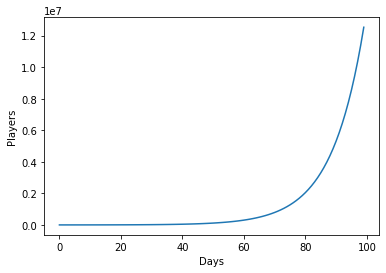

In [ ]:
#Parameters
players=1000
viralityProbability=0.1

#Empty Python list, simulation data will be added to this
data=[]

#Simulation loop 
for i in range(100):
    #store this day's player count for plotting
    data.append(players)
    #simulate
    players=players + viralityProbability*players
    
#plot
plt.plot(data)
plt.xlabel("Days")
plt.ylabel("Players")

### Exercise: Add simulation of churn, i.e., players quitting with some probability.


Add a code cell to type in the code. **Only click to show the model solution below after you've tried to implement the code yourself.**

Hint: you should be able to do this by copying the code above and making two changes: 1) add a line that defines a churnProbability, and subtract churned players from the current player count similar to how the virally recruited players are added

Text(0, 0.5, 'Players')

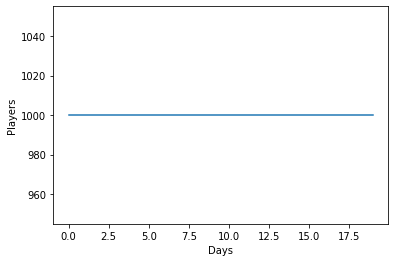

In [ ]:
#@title Solution (click to show)
#simulate
players=1000
viralityProbability=0.1
churnProbability=0.1
data=[]
for i in range(20):
    data.append(players)
    players=players + viralityProbability*players - churnProbability*players
#plot
plt.plot(data)
plt.xlabel("Days")
plt.ylabel("Players")

### Parameter sliders

To make adjusting the parameters a bit intuitive an visual, one can use the @param metadata. After changing a parameter's value, one must run the code again. The keyboard shortcut for that is ctrl+enter, but note that it requires that the input focus is on the code, i.e., you must click the code window after adjusting a slider. 

More examples: https://colab.research.google.com/notebooks/forms.ipynb 

Text(0, 0.5, 'Players')

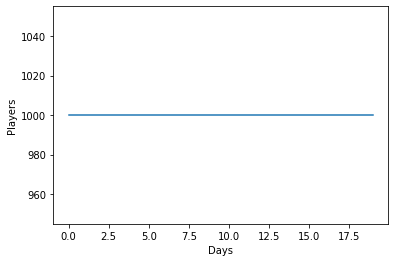

In [ ]:
#simulate
players=1000  #@param {type:"slider", min:0, max:1000, step:10}
viralityProbability=0.1 #@param {type:"slider", min:0.0, max:1.0}
churnProbability=0.1  #@param {type:"slider", min:0.0, max:1.0}
data=[]
for i in range(20):
    data.append(players)
    players=players + viralityProbability*players - churnProbability*players

#plot
plt.plot(data)
plt.xlabel("Days")
plt.ylabel("Players")

###Multiple plots
To show how the dynamics change with respect to some parameter, it can be useful to plot multiple curves together.

We do this by first moving the simulation code inside a function, and then calling the function with different values for the virality.

In Python, one defines functions with the "def" keyword, with a ":" after the function name and parameters.

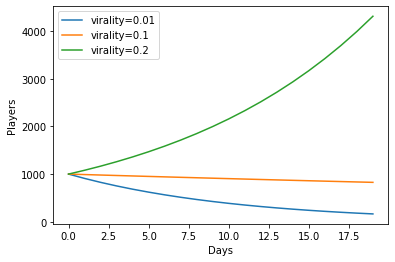

In [ ]:
#The simulation function
def simulate(viralityProbability):
    players=1000  
    churnProbability=0.1  
    data=[]
    for i in range(20):
        data.append(players)
        players-=churnProbability*players
        players+=viralityProbability*players
    return data #we return the generated list of player counts

#For loop that runs multiple simulations.
#Instead of using the range() function, one can define
#the values looped through using a list
for viralityProbability in [0.01,0.1,0.2]:
    #Get the simulated player counts
    data=simulate(viralityProbability)
    #Plotted curves can have labels. We use .format() similar to the printouts above.
    plt.plot(data,label="virality={}".format(viralityProbability))

#plot
plt.xlabel("Days")
plt.ylabel("Players")
plt.legend() #this makes the labels visible

###Interaction

An alternative to the @param metadata is using @interact before a function definition. This adds user interface elements like sliders and the function is called whenever the user adjusts the slider.  

Note that the plotting is now inside the function so that the plot gets updated whenever the user adjusts the slider.

More examples can be found at https://colab.research.google.com/github/jupyter-widgets/ipywidgets/blob/master/docs/source/examples/Using%20Interact.ipynb


In [ ]:
#The @interact attribute, with three numbers defining the slider min, max, step
@interact(viralityProbability=(0,1,0.01))   
#The function definition, which also gives the slider initial value
def simulate(viralityProbability=0.1):      
    players=1000  
    churnProbability=0.1  
    data=[]
    for i in range(20):
        data.append(players)
        players=players + viralityProbability*players - churnProbability*players
    plt.plot(data)
    plt.xlabel("Days")
    plt.ylabel("Players")



interactive(children=(FloatSlider(value=0.1, description='viralityProbability', max=1.0, step=0.01), Output())…

### Exercises: Simulate game monetization and company cashflow

In these exercises, you'll expand the simulation above to monetization and cashflow prediction.


First, let's implement and plot revenue per user from both in app purchases and game purchases. Read and understand the code below, then proceed to the exercises where you'll modify it.

Text(0, 0.5, 'Money')

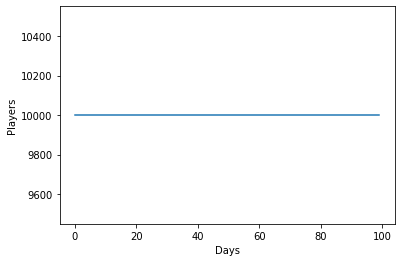

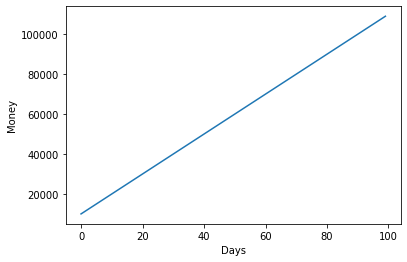

In [ ]:
#Define simulation parameters
initialMarketingBudget=10000
money=20000 
pricePerUser=1
viralityProbability=0.1
churnProbability=0.1
dailyRevenuePerPlayer=0.1
gamePrice=0

#Compute initial values: Buy some initial players
players=initialMarketingBudget/pricePerUser
money-=initialMarketingBudget
money+=players*gamePrice  #if the game price >0, the initial players also bring some revenue

#Lists for results
playerCounts=[]
moneyAmounts=[]

#Simulate
for i in range(100):
    #Store results
    moneyAmounts.append(money)
    playerCounts.append(players)

    #Now, we explicitly compute new and churned players
    #and store them into variables, as we need them
    #for the monetization calculation 
    newPlayers=viralityProbability*players 
    churnedPlayers=churnProbability*players

    #Update monetization
    money+=players*dailyRevenuePerPlayer
    money+=gamePrice*newPlayers

    #Update player count
    players=players + newPlayers - churnedPlayers

#plot players over time
plt.plot(playerCounts)
plt.xlabel("Days")
plt.ylabel("Players")

#plot money over time
plt.figure()  #create new plot
plt.plot(moneyAmounts)
plt.xlabel("Days")
plt.ylabel("Money")

**Exercise: Implement personnel costs**

Add parameters: Number of employees, monthly salary (divide by 21 to get daily salary), employer auxiliary cost multiplier, and employer overheads multiplier (rent, computers, software). Update the money calculations accordingly. Add a new code cell and copy-paste the simulation code above to get started. 

For the auxiliary cost multiplier, you can use 1.36 (https://www.businessfinland.fi/en/do-business-with-finland/invest-in-finland/business-environment/cost-calculator). For overheads, a realistic multiplier is somewhere around 1.5 or 2.0.

If you start the simulation with churnProbability=viralityProbability, you can now see how the company is making a steady loss. However, your should see that if one manages to increase virality even a bit, the initial loss will turn into exponentially increasing profits. In practice, though, achieving such virality is very hard. 

Monthly burn: 28560.0
Daily burn: 1360.0


Text(0, 0.5, 'Money')

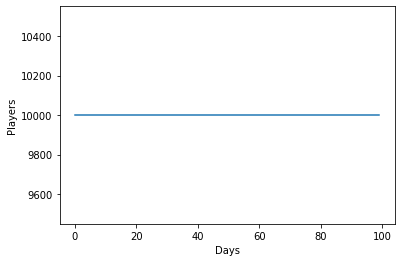

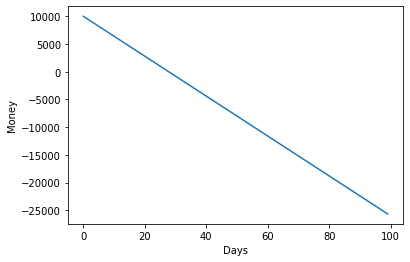

In [ ]:
#@title Solution (click to show)
#Define simulation parameters
initialMarketingBudget=10000
money=20000 
pricePerUser=1
viralityProbability=0.1
churnProbability=0.1
dailyRevenuePerPlayer=0.1
employees=4
monthlySalary=3500
auxiliaryMultiplier=1.36
overheadsMultiplier=1.5
gamePrice=0

#Compute and print monthly and daily burn
monthlyBurn=employees*monthlySalary*auxiliaryMultiplier*overheadsMultiplier
dailyBurn=monthlyBurn/21
print("Monthly burn:",monthlyBurn)
print("Daily burn:",dailyBurn)

#Compute initial values: Buy some initial players
players=initialMarketingBudget/pricePerUser
money-=initialMarketingBudget
money+=players*gamePrice  #if the game price >0, the initial players also bring some revenue

#Lists for results
playerCounts=[]
moneyAmounts=[]

#Simulate
for i in range(100):
    #Store results
    moneyAmounts.append(money)
    playerCounts.append(players)

    #Now, we explicitly compute new and churned players
    #and store them into variables, as we need them
    #for the monetization calculation 
    newPlayers=viralityProbability*players 
    churnedPlayers=churnProbability*players

    #Update monetization
    money+=players*dailyRevenuePerPlayer
    money+=gamePrice*newPlayers
    money-=dailyBurn

    #Update player count
    players=players + newPlayers - churnedPlayers

#plot players over time
plt.plot(playerCounts)
plt.xlabel("Days")
plt.ylabel("Players")

#plot money over time
plt.figure()  #create new plot
plt.plot(moneyAmounts)
plt.xlabel("Days")
plt.ylabel("Money")

**Exercise: Invest revenue in user acquisition**

Add a parameter that defines the percentage of revenue that is invested in user acquisition. You should see that this is the key to make exponentially growing profits even if the game is not viral, but each player provides some revenue.

This is basically what companies try to estimate when soft-launching games: Measure retention, virality, and average revenue per user on a small market to gain evidence of exponential growth potential and that the game or company is worth investing in.


Monthly burn: 28560.0
Daily burn: 1360.0


Text(0, 0.5, 'Money')

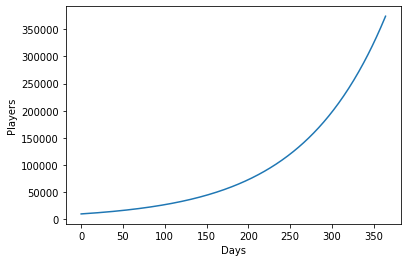

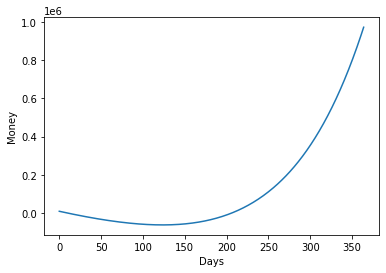

In [ ]:
#@title Solution (click to show)
#Define simulation parameters
initialMarketingBudget=10000
money=20000 
pricePerUser=1
viralityProbability=0.0
churnProbability=0.05
dailyRevenuePerPlayer=0.1
employees=4
monthlySalary=3500
auxiliaryMultiplier=1.36
overheadsMultiplier=1.5
gamePrice=0
userAcquisitionPercentage=60

#Compute and print monthly and daily burn
monthlyBurn=employees*monthlySalary*auxiliaryMultiplier*overheadsMultiplier
dailyBurn=monthlyBurn/21
print("Monthly burn:",monthlyBurn)
print("Daily burn:",dailyBurn)

#Compute initial values: Buy some initial players
players=initialMarketingBudget/pricePerUser
money-=initialMarketingBudget
money+=players*gamePrice  #if the game price >0, the initial players also bring some revenue

#Lists for results
playerCounts=[]
moneyAmounts=[]

#Simulate
for i in range(365):
    #Store results
    moneyAmounts.append(money)
    playerCounts.append(players)

    #Now, we explicitly compute new and churned players
    #and store them into variables, as we need them
    #for the monetization calculation 
    viralPlayers=viralityProbability*players 
    churnedPlayers=churnProbability*players

    #Update monetization and user acquisition
    revenue=players*dailyRevenuePerPlayer+gamePrice*viralPlayers
    userAcquisitionBudget=revenue*userAcquisitionPercentage/100
    money=money+revenue-dailyBurn-userAcquisitionBudget
    acquiredPlayers=userAcquisitionBudget/pricePerUser


    #Update player count
    players=players + acquiredPlayers + viralPlayers - churnedPlayers

#plot players over time
plt.plot(playerCounts)
plt.xlabel("Days")
plt.ylabel("Players")

#plot money over time
plt.figure()  #create new plot
plt.plot(moneyAmounts)
plt.xlabel("Days")
plt.ylabel("Money")